# Naive Bayes Classifier on Real-World Datasets

## Part 1: Loading and Preprocessing the Datasets

### 1.1 Loading and Exploring the Iris Dataset

In [44]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X_iris, y_iris = iris.data, iris.target
iris_df = pd.DataFrame(X_iris, columns=iris.feature_names)
iris_df['target'] = y_iris

print("First five rows of Iris dataset:")
display(iris_df.head())


X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)


First five rows of Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 1.2 Loading and Exploring the SMS Spam Collection Dataset

In [45]:
import pandas as pd
import zipfile
import requests
from io import BytesIO


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    with z.open('SMSSpamCollection') as f:
        
        sms_df = pd.read_csv(f, sep='\t', names=['label', 'message'])

print("First five rows of SMS Spam dataset:")
display(sms_df.head())

First five rows of SMS Spam dataset:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:

sms_df['label'] = sms_df['label'].map({'ham': 0, 'spam': 1})


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')


X_sms = tfidf_vectorizer.fit_transform(sms_df['message'])
y_sms = sms_df['label']


from sklearn.model_selection import train_test_split
X_train_sms, X_test_sms, y_train_sms, y_test_sms = train_test_split(X_sms, y_sms, test_size=0.3, random_state=42)


## Part 2: Implementing Naive Bayes Classifier

In [47]:

from sklearn.naive_bayes import GaussianNB, MultinomialNB


gnb = GaussianNB()
gnb.fit(X_train_iris, y_train_iris)
iris_predictions = gnb.predict(X_test_iris)


mnb = MultinomialNB()
mnb.fit(X_train_sms, y_train_sms)
sms_predictions = mnb.predict(X_test_sms)


## Part 3: Model Evaluation

In [48]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


print("Iris Dataset Evaluation")
iris_accuracy = accuracy_score(y_test_iris, iris_predictions)
iris_conf_matrix = confusion_matrix(y_test_iris, iris_predictions)
iris_classification_report = classification_report(y_test_iris, iris_predictions)

print(f"Accuracy: {iris_accuracy}")
print("Confusion Matrix:")
print(iris_conf_matrix)
print("Classification Report:")
print(iris_classification_report)


print("SMS Spam Dataset Evaluation")
sms_accuracy = accuracy_score(y_test_sms, sms_predictions)
sms_conf_matrix = confusion_matrix(y_test_sms, sms_predictions)
sms_classification_report = classification_report(y_test_sms, sms_predictions)

print(f"Accuracy: {sms_accuracy}")
print("Confusion Matrix:")
print(sms_conf_matrix)
print("Classification Report:")
print(sms_classification_report)


Iris Dataset Evaluation
Accuracy: 0.9777777777777777
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

SMS Spam Dataset Evaluation
Accuracy: 0.972488038277512
Confusion Matrix:
[[1447    1]
 [  45  179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1448
           1       0.99      0.80      0.89       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



## Part 4: Saving and Loading the Model

In [49]:

import joblib


joblib.dump(gnb, 'iris_naive_bayes_model.pkl')
joblib.dump(mnb, 'sms_naive_bayes_model.pkl')


loaded_iris_model = joblib.load('iris_naive_bayes_model.pkl')
loaded_sms_model = joblib.load('sms_naive_bayes_model.pkl')


## Part 5: Visualization (Confusion Matrix)

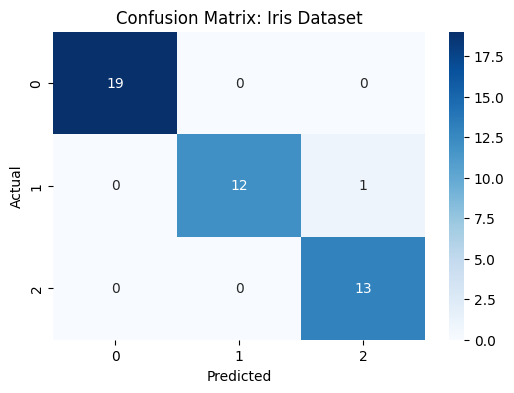

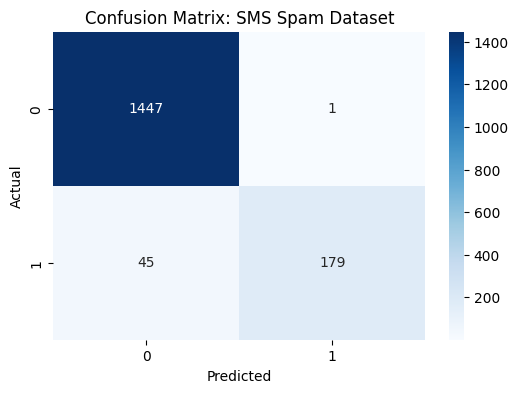

In [50]:

import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion_matrix(iris_conf_matrix, 'Iris Dataset')


plot_confusion_matrix(sms_conf_matrix, 'SMS Spam Dataset')
